Load the Data

In [75]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [76]:
project_root = os.path.abspath('..')
sys.path.append(project_root)

from src.remove_outliers import remove_extreme_outliers

In [77]:
# load dataset
df = pd.read_csv('../data/raw/AmesHousing.csv')
print(f'Dataset shape: {df.shape}')

Dataset shape: (2930, 82)


In [78]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [80]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Data Quality Checks

In [81]:
# consistent naming
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

In [82]:
# check missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

pool_qc           2917
misc_feature      2824
alley             2732
fence             2358
mas_vnr_type      1775
fireplace_qu      1422
lot_frontage       490
garage_qual        159
garage_cond        159
garage_yr_blt      159
garage_finish      159
garage_type        157
bsmt_exposure       83
bsmtfin_type_2      81
bsmt_cond           80
bsmt_qual           80
bsmtfin_type_1      80
mas_vnr_area        23
bsmt_full_bath       2
bsmt_half_bath       2
bsmtfin_sf_1         1
bsmtfin_sf_2         1
electrical           1
total_bsmt_sf        1
bsmt_unf_sf          1
garage_area          1
garage_cars          1
dtype: int64

In [83]:
# fill with none (absence of feature)
fill_none_cols = [
    'pool_qc', 'misc_feature', 'alley', 'fence', 'mas_vnr_type',
    'fireplace_qu', 'garage_qual', 'garage_cond', 'garage_finish', 'garage_type',
    'bsmt_exposure', 'bsmtfin_type_2', 'bsmt_cond', 'bsmt_qual', 'bsmtfin_type_1'
]
df[fill_none_cols] = df[fill_none_cols].fillna('None')

# fill with zero (absence of quantity)
fill_zero_cols = [
    'mas_vnr_area', 'bsmt_full_bath', 'bsmt_half_bath',
    'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
    'total_bsmt_sf', 'garage_area', 'garage_cars', 'garage_yr_blt'
]
df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

# fill lot frontage by using a median within each neighborhood
df['lot_frontage'] = (
    df.groupby('neighborhood')['lot_frontage']
    .transform(lambda x: x.fillna(x.dropna().median()))
    .fillna(df['lot_frontage'].median())
)


df['electrical'].fillna(df['electrical'].mode()[0], inplace=True)


C:\Users\SHRI\AppData\Local\Temp\ipykernel_1940\3140970268.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['electrical'].fillna(df['electrical'].mode()[0], inplace=True)


In [84]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

In [85]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

Series([], dtype: int64)

In [86]:
df.nunique()

order             2930
pid               2930
ms_subclass         16
ms_zoning            7
lot_frontage       130
                  ... 
mo_sold             12
yr_sold              5
sale_type           10
sale_condition       6
saleprice         1032
Length: 82, dtype: int64

Target Variable

In [87]:
df['saleprice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

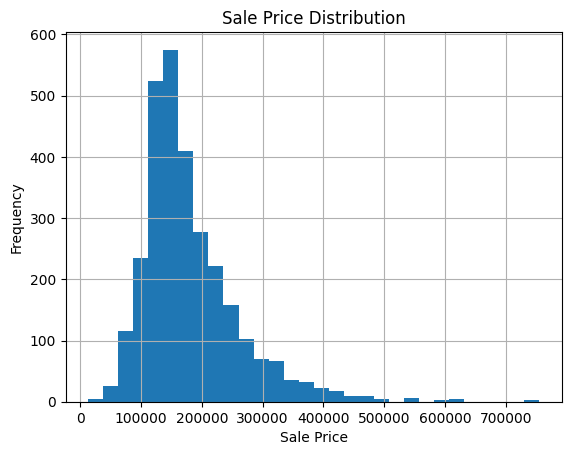

In [88]:
df['saleprice'].hist(bins=30)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

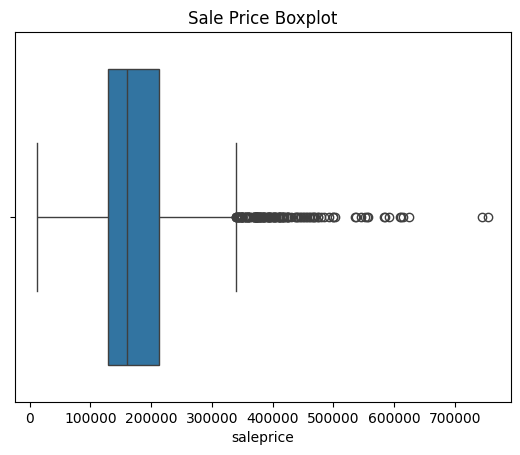

In [89]:
sns.boxplot(x=df['saleprice'])
plt.title('Sale Price Boxplot')
plt.show()


In [90]:
print("Skewness:",df['saleprice'].skew())
print("Kurtosis:",df['saleprice'].kurt())

Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896


In [91]:
df['log_saleprice'] = np.log1p(df['saleprice'])

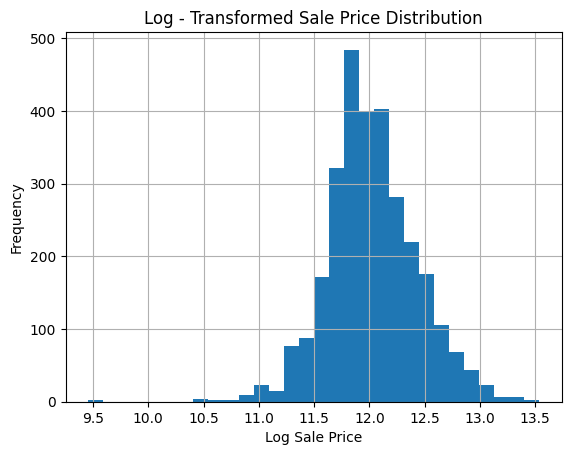

In [92]:
df['log_saleprice'].hist(bins=30)
plt.title('Log - Transformed Sale Price Distribution')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.show()

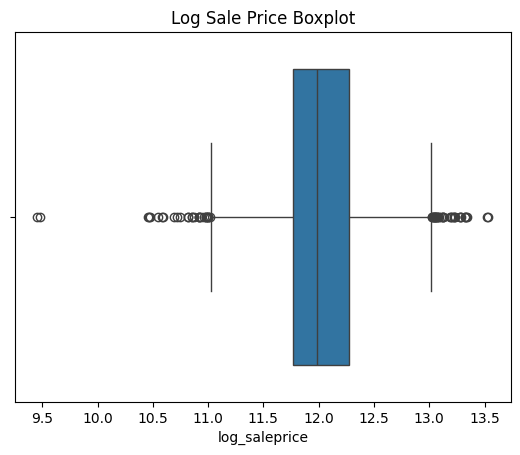

In [93]:
sns.boxplot(x=df['log_saleprice'])
plt.title('Log Sale Price Boxplot')
plt.show()

In [94]:
print("Log Skewness:",df['log_saleprice'].skew())
print("Log Kurtosis:",df['log_saleprice'].kurt())

Log Skewness: -0.014772659537224368
Log Kurtosis: 1.5138180928006526


Numeric Features

In [95]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()['log_saleprice'].sort_values(ascending=False)
print(correlation.head(10))
print(correlation.tail(10))

log_saleprice     1.000000
saleprice         0.946304
overall_qual      0.825645
gr_liv_area       0.695863
garage_cars       0.674878
garage_area       0.650767
total_bsmt_sf     0.625622
year_built        0.615485
1st_flr_sf        0.602629
year_remod/add    0.586153
Name: log_saleprice, dtype: float64
misc_val          -0.008718
bsmt_half_bath    -0.020893
order             -0.028814
yr_sold           -0.033131
low_qual_fin_sf   -0.044842
overall_cond      -0.048294
ms_subclass       -0.070744
kitchen_abvgr     -0.128213
enclosed_porch    -0.142486
pid               -0.261666
Name: log_saleprice, dtype: float64


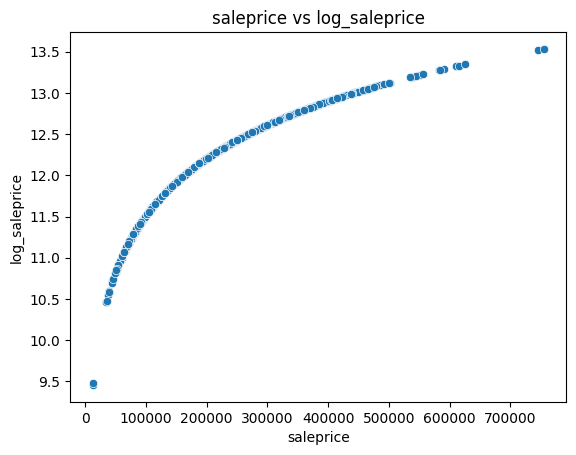

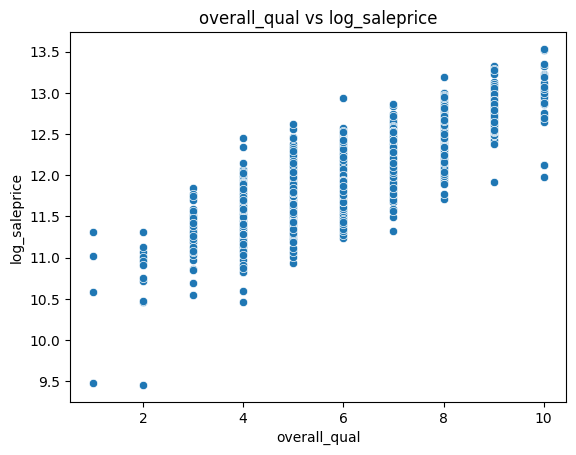

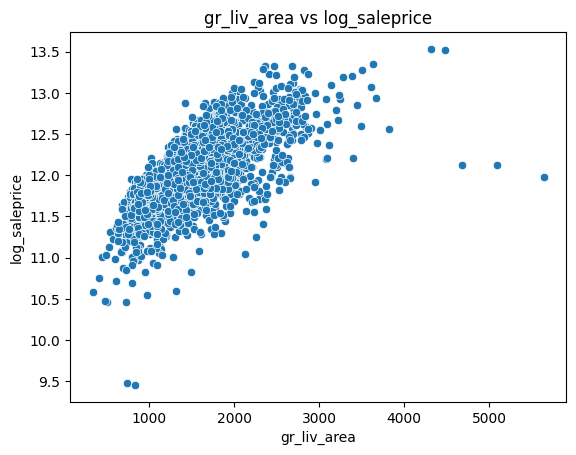

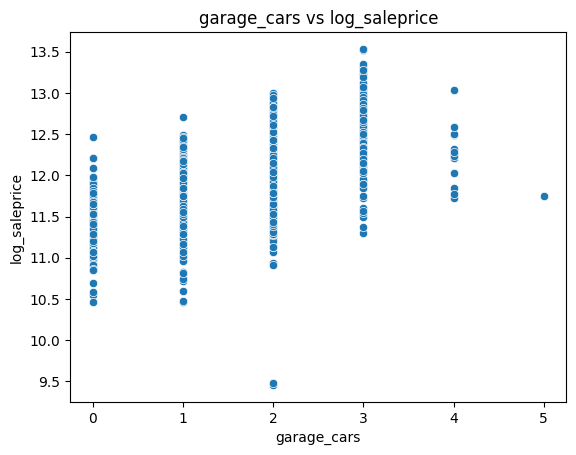

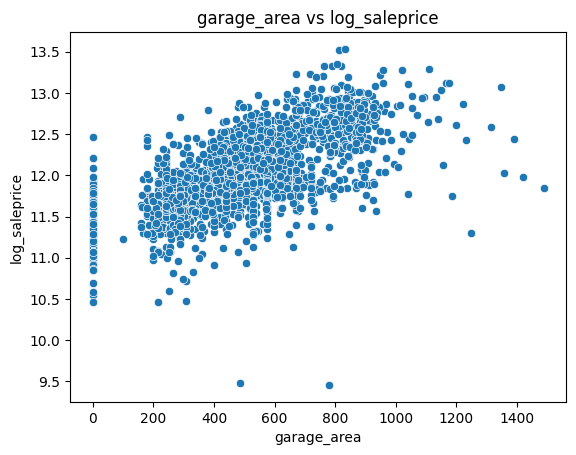

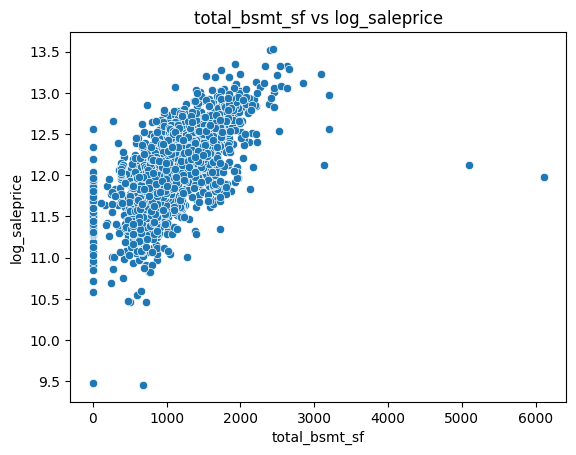

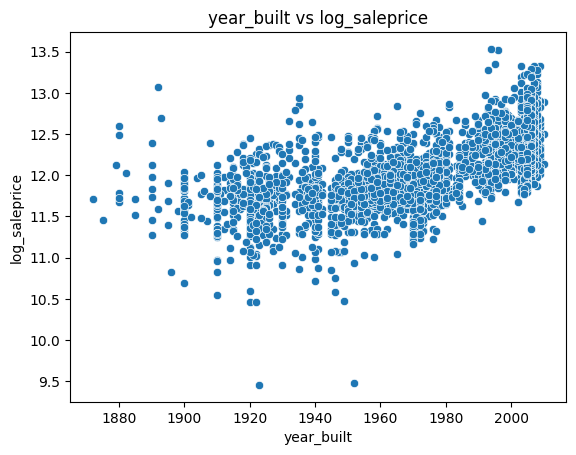

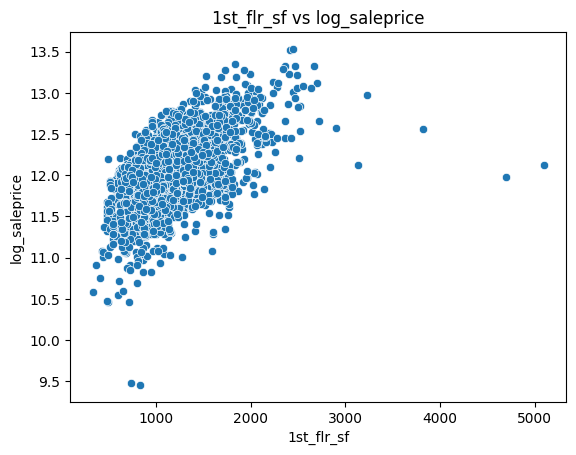

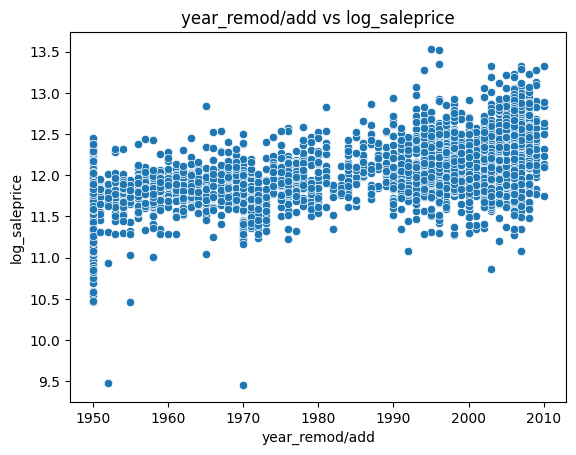

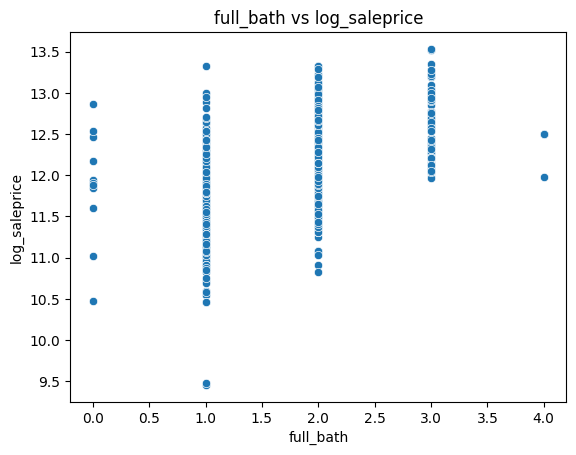

In [96]:
top_corr = correlation[1:11]
for feature in top_corr.index:
    sns.scatterplot(x=df[feature], y=df['log_saleprice'])
    plt.title(f'{feature} vs log_saleprice')
    plt.xlabel(feature)
    plt.ylabel('log_saleprice')
    plt.show()

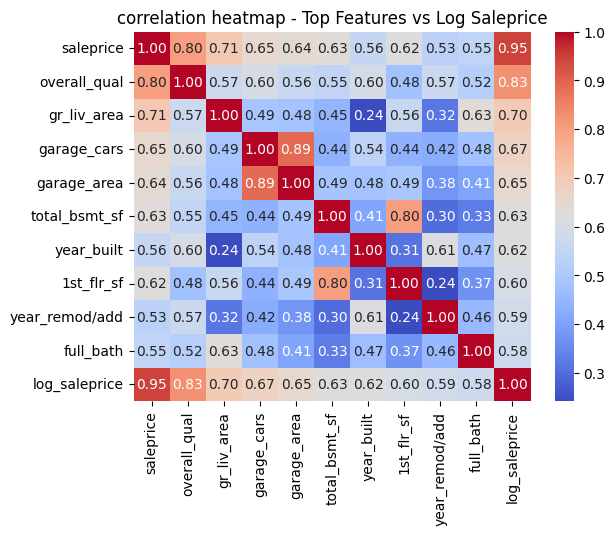

In [97]:
top_features = correlation[1:11].index.to_list()
top_features.append('log_saleprice')

plt.figure()
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap - Top Features vs Log Saleprice')
plt.show()

Categorical Features

In [98]:
categorical_feats = df.select_dtypes(include=['category']).columns
categorical_feats

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type', 'sale_condition'],
      dtype='object')

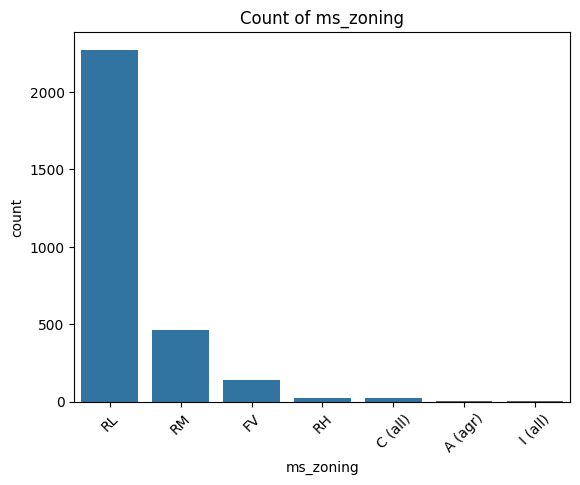

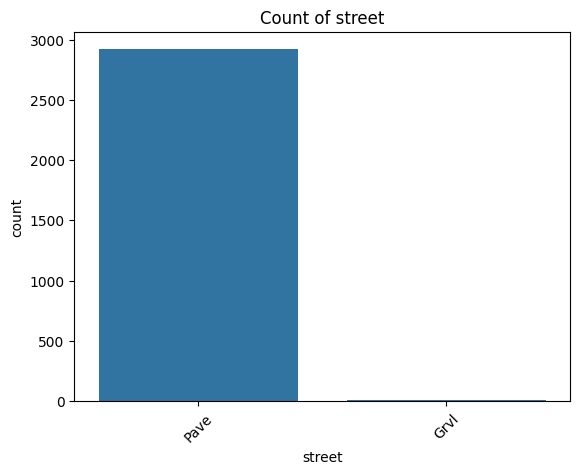

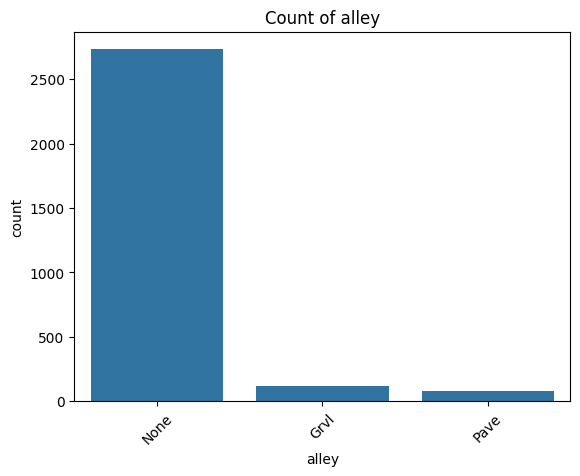

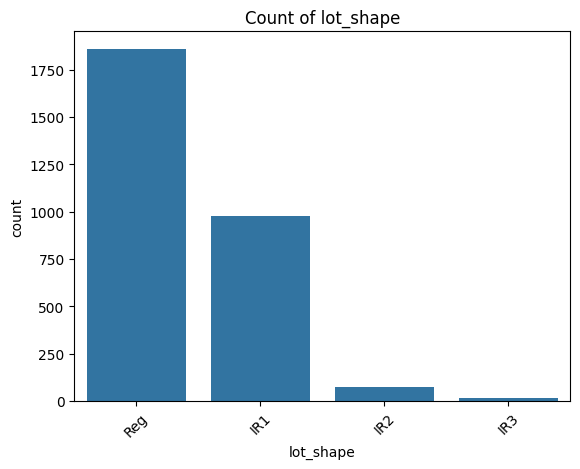

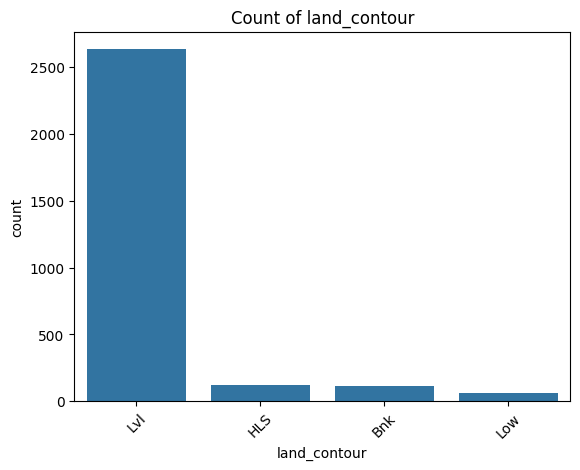

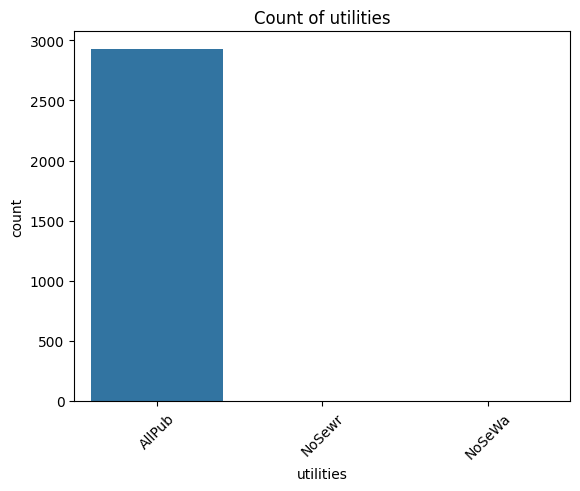

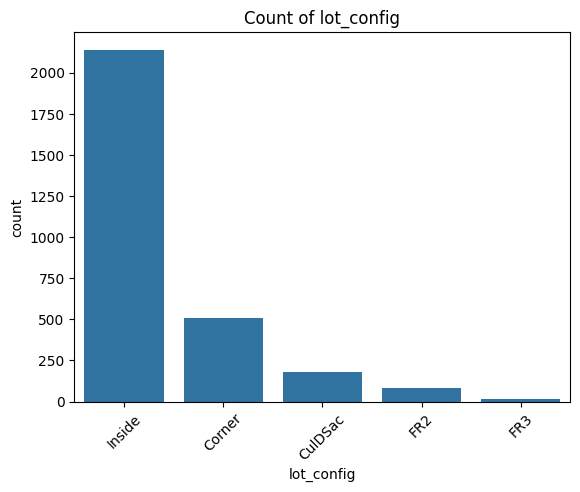

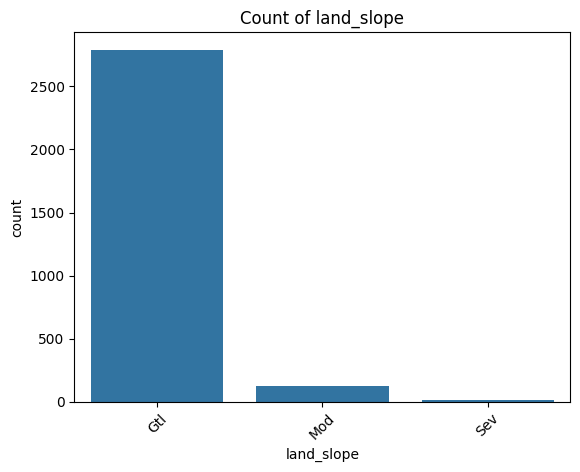

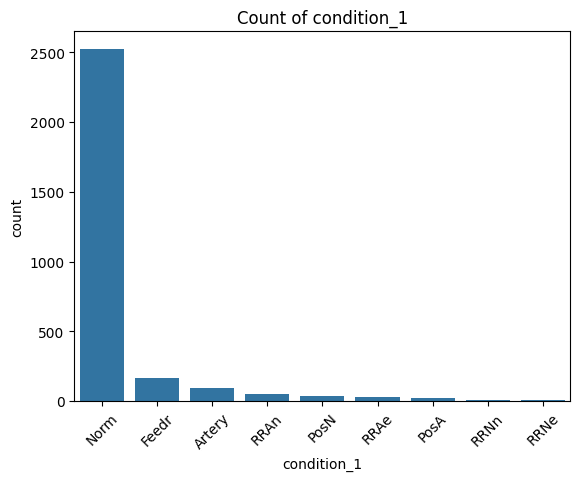

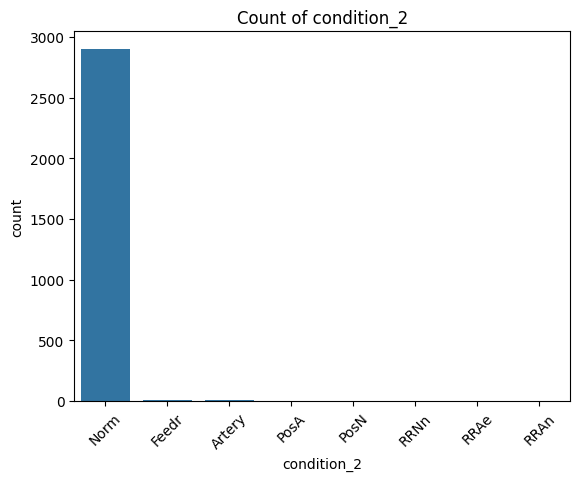

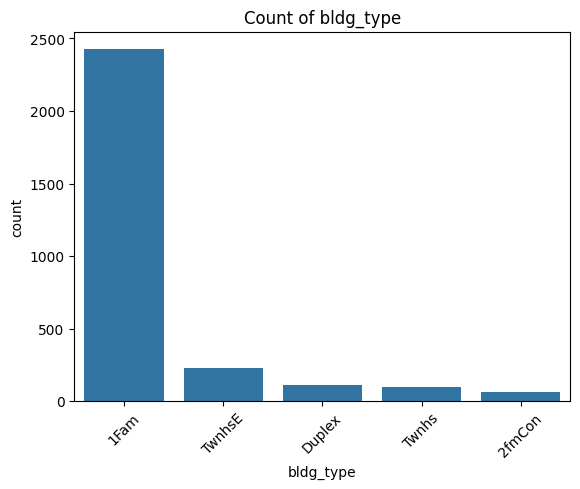

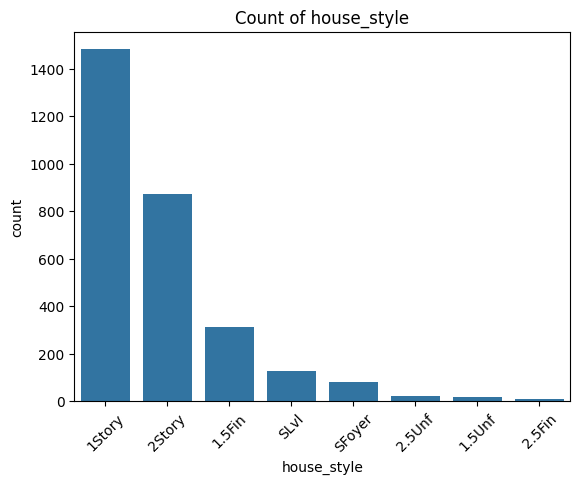

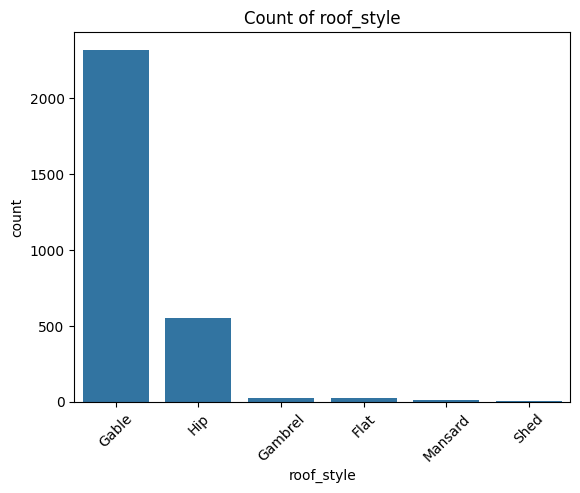

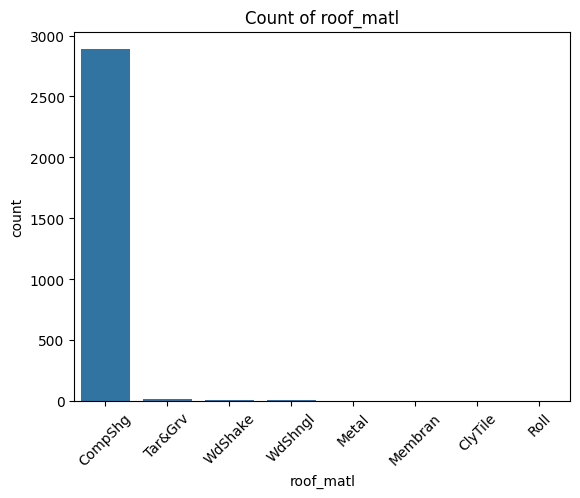

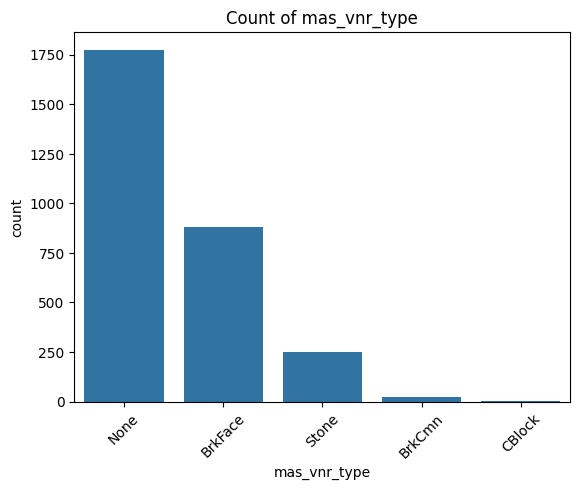

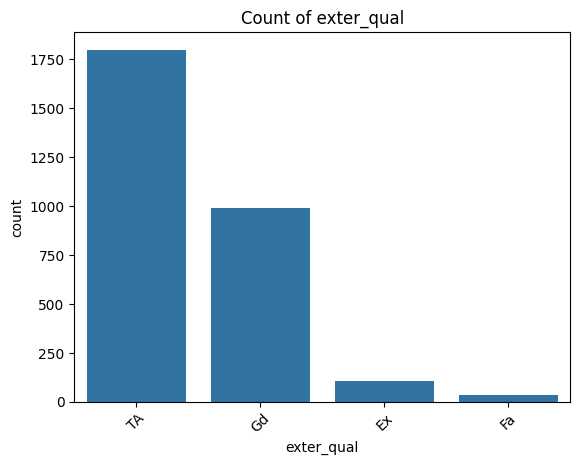

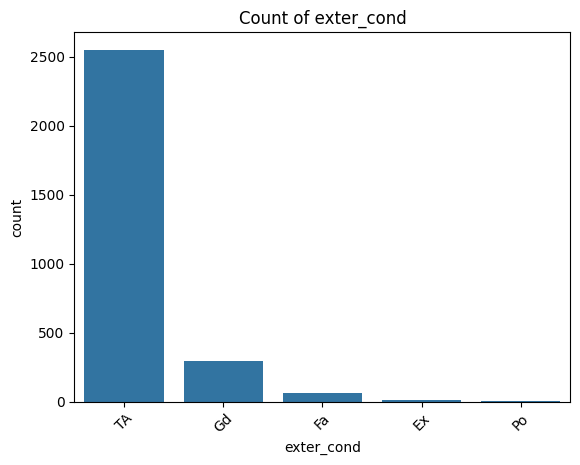

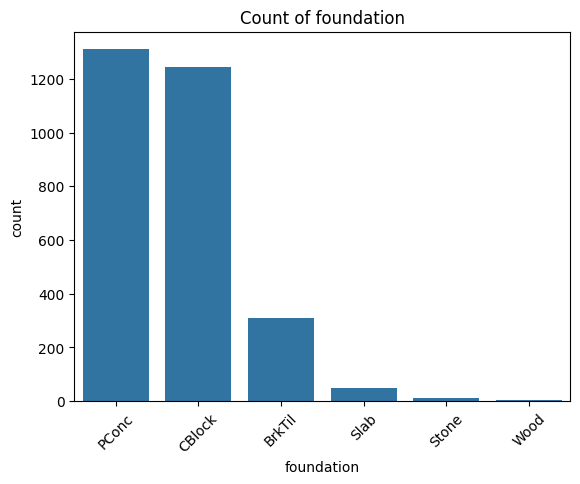

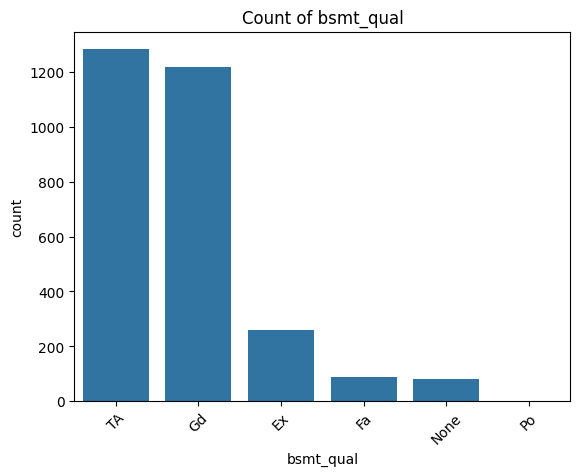

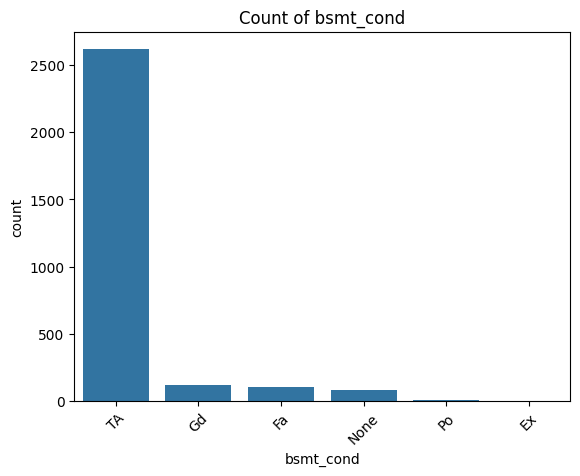

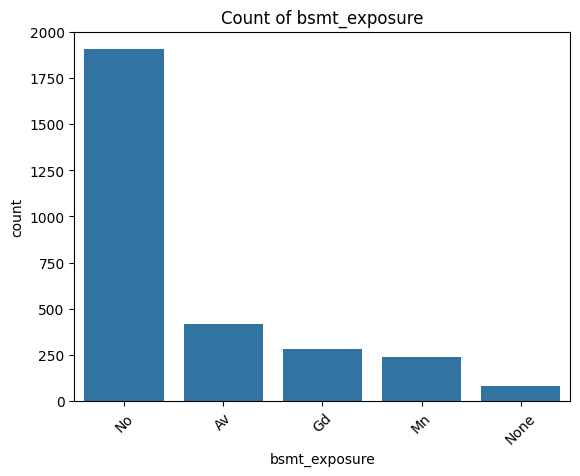

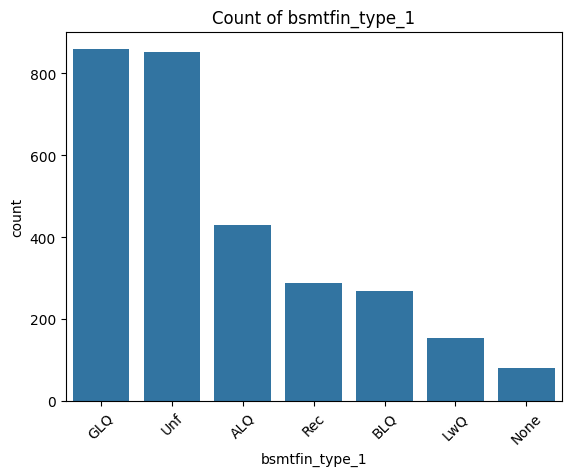

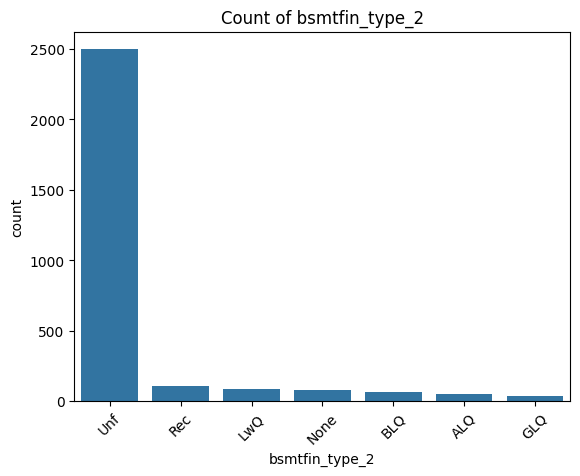

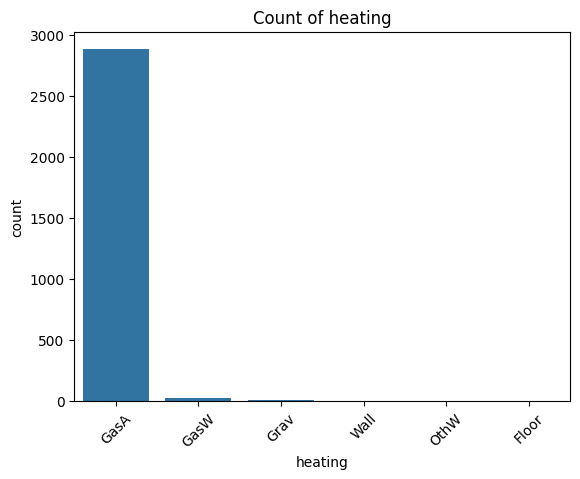

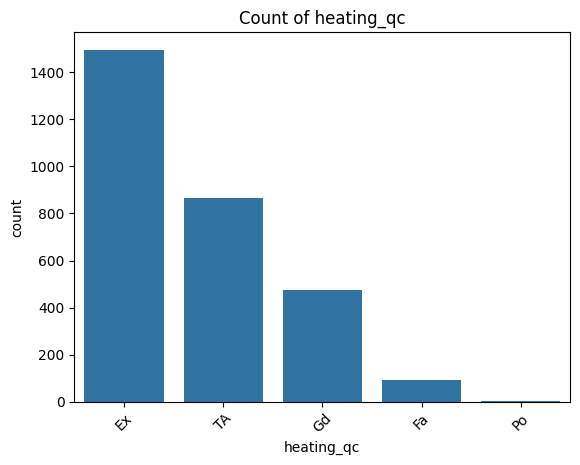

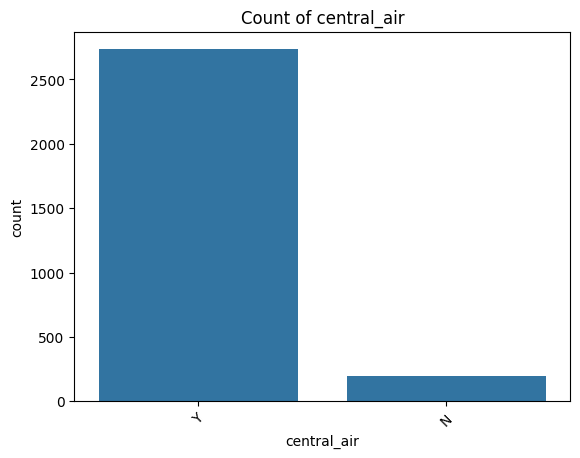

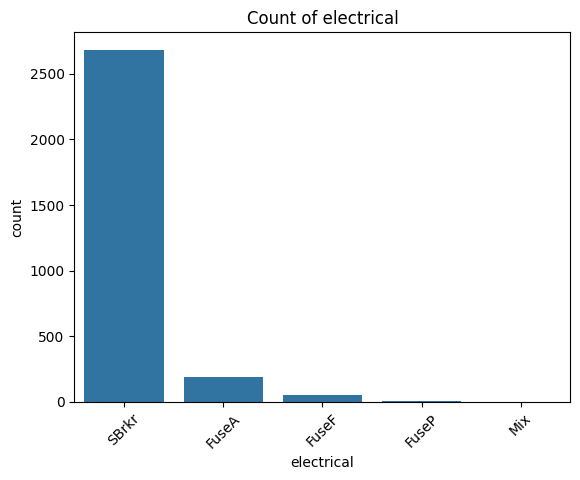

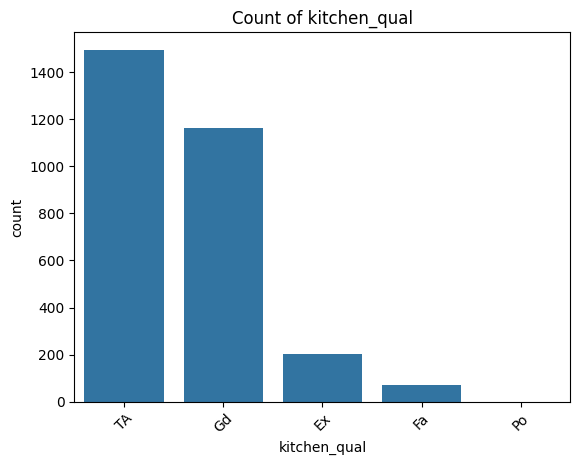

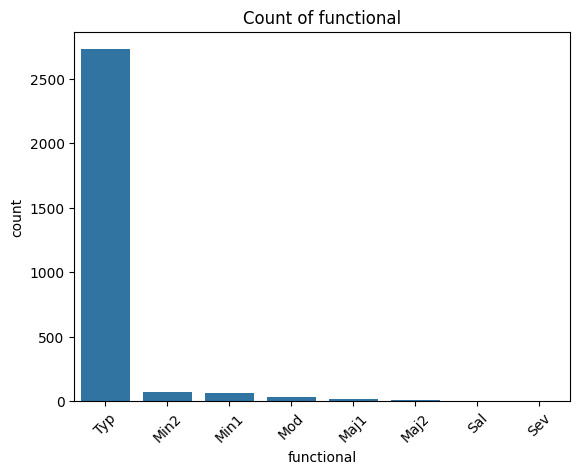

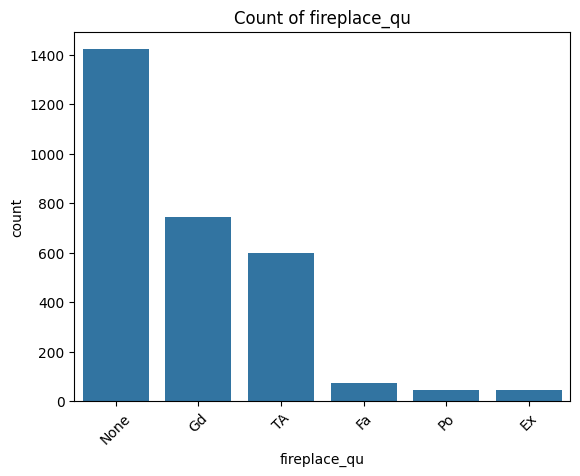

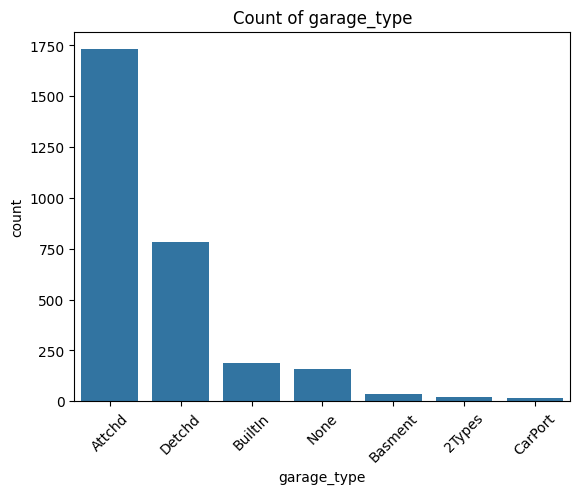

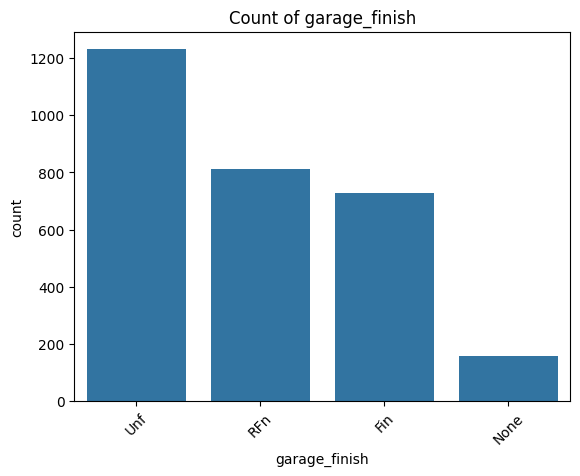

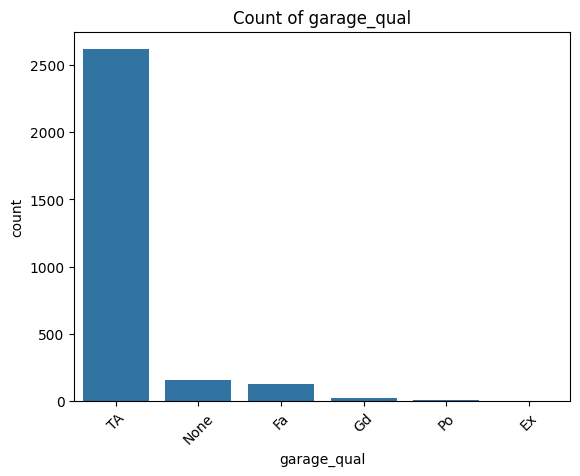

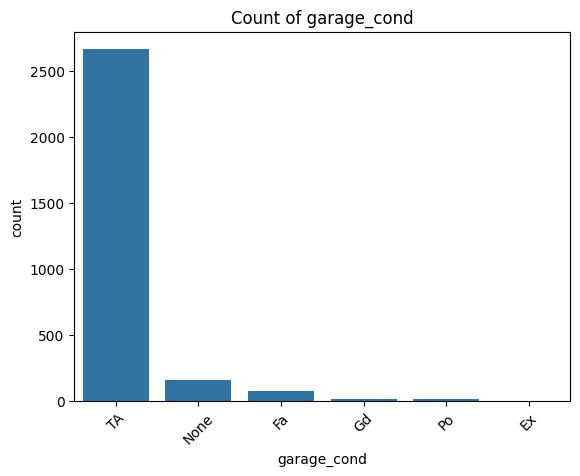

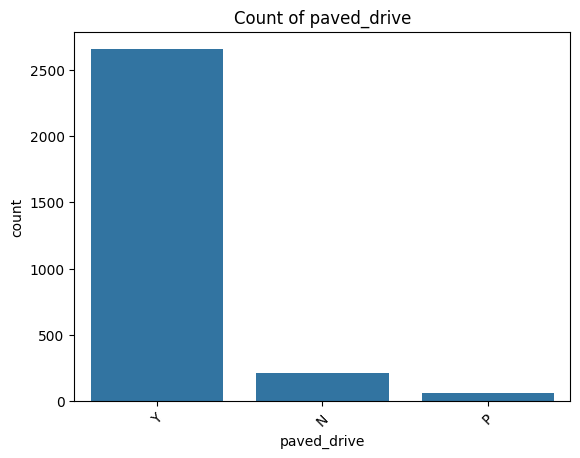

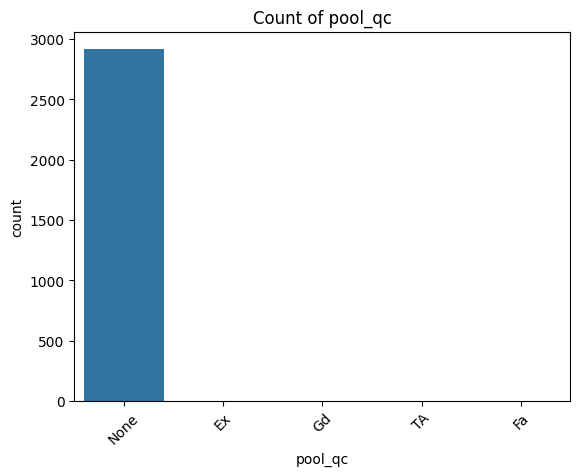

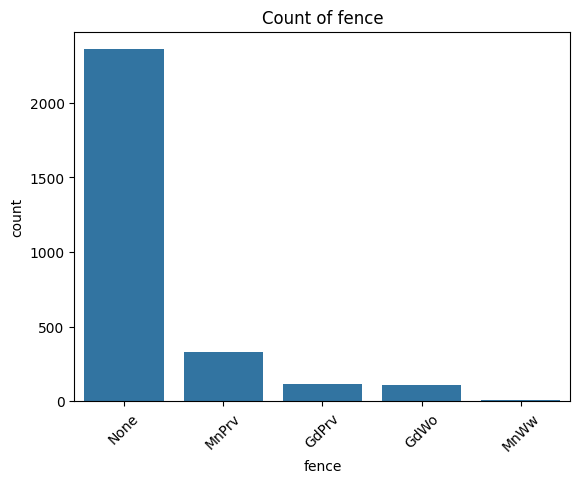

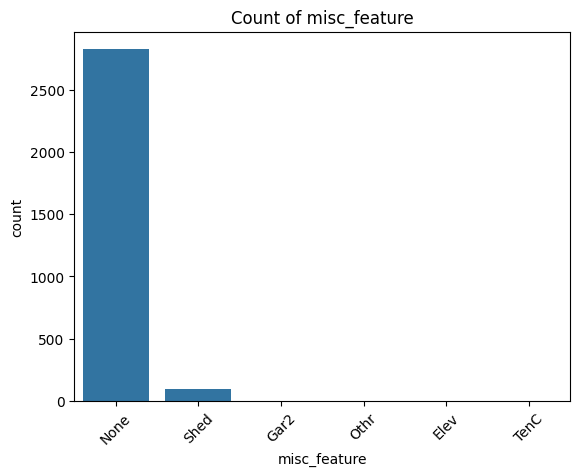

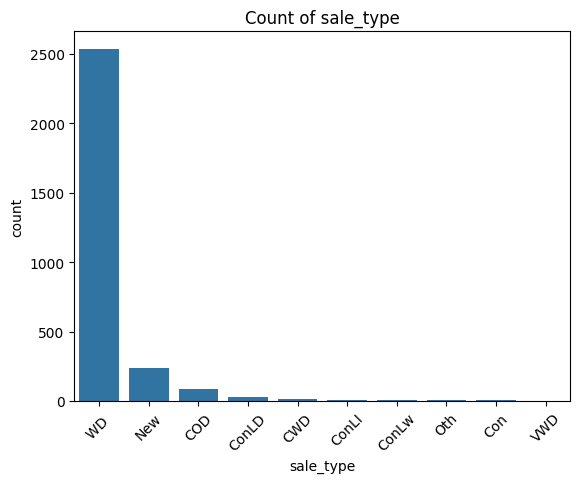

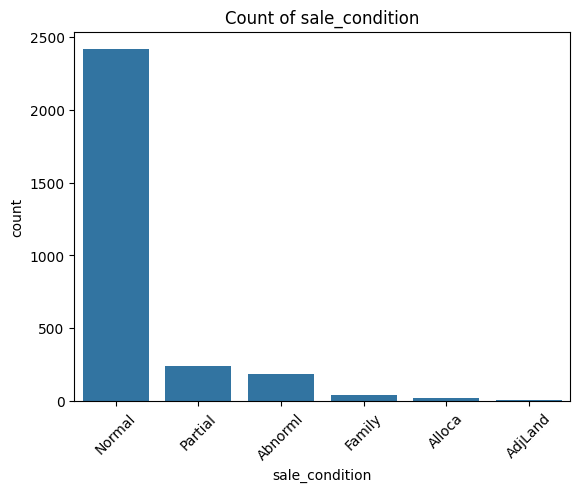

In [99]:
for col in categorical_feats:
    if df[col].nunique() < 15:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Count of {col}')
        plt.show()

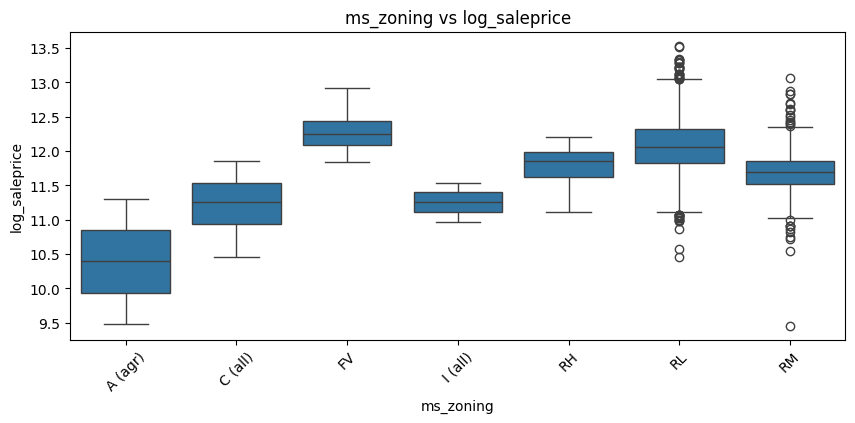

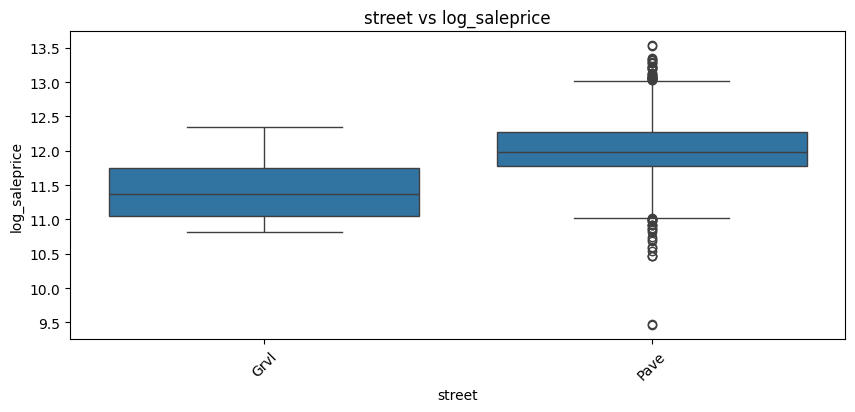

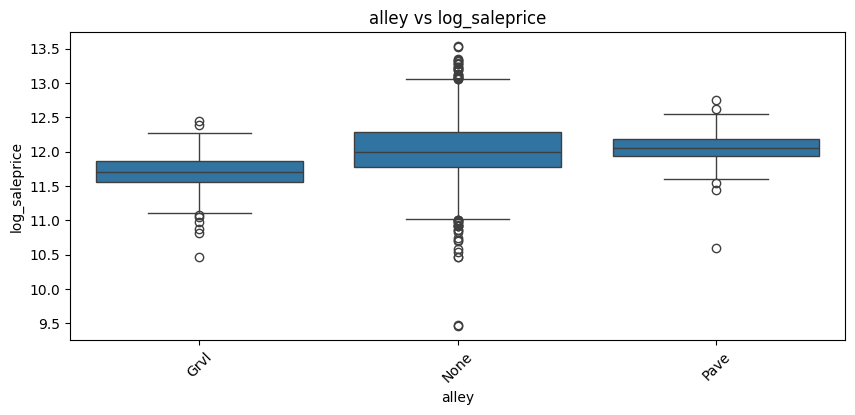

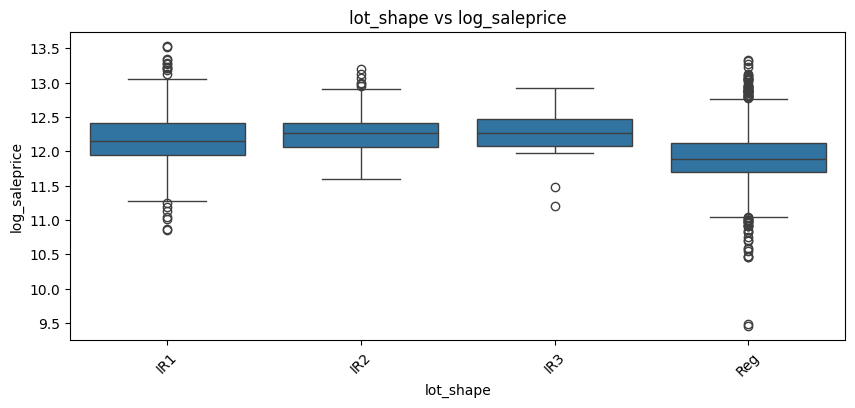

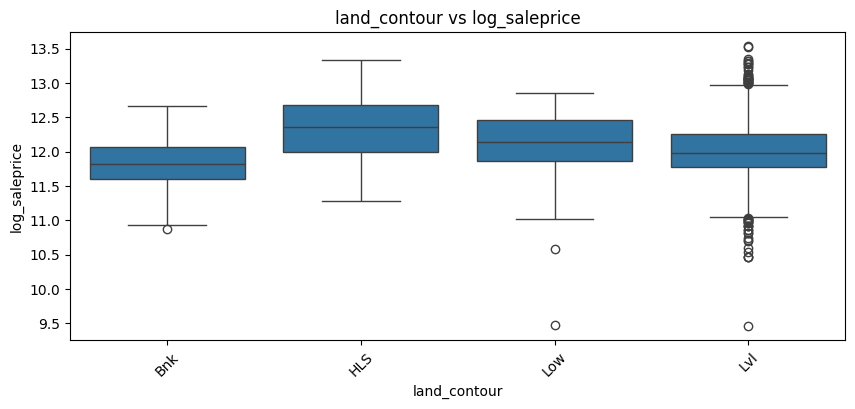

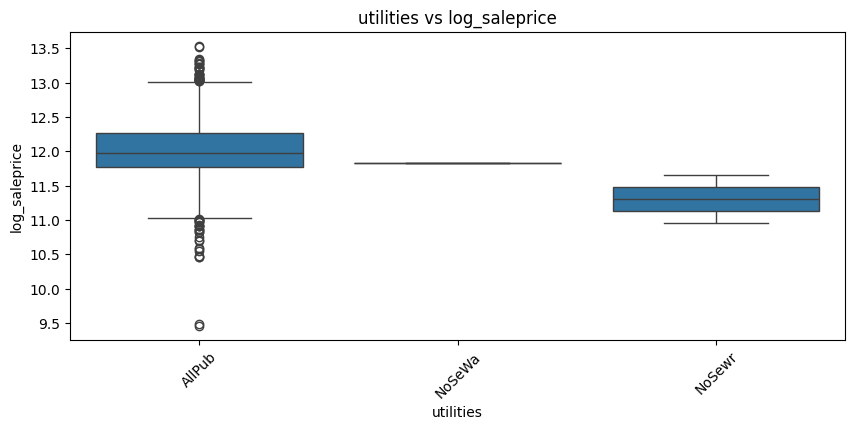

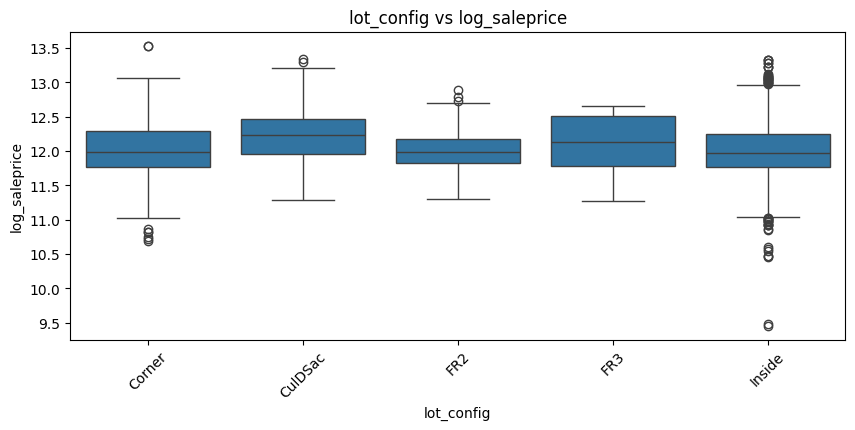

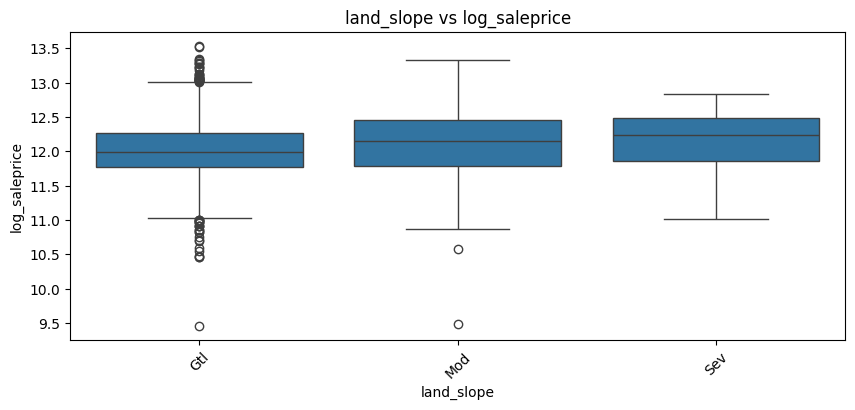

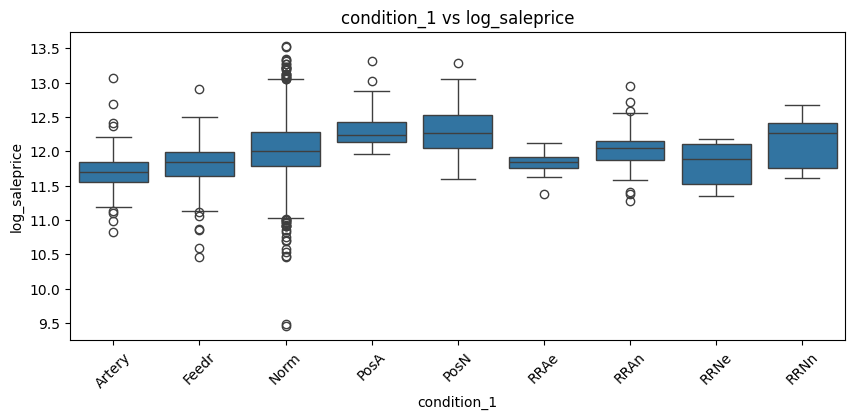

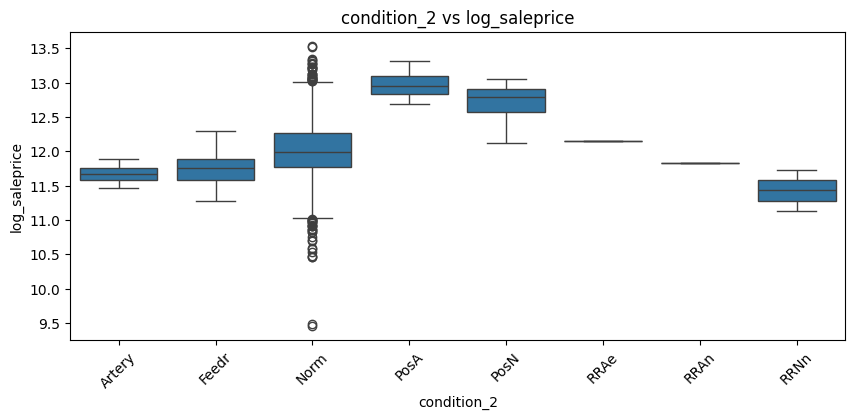

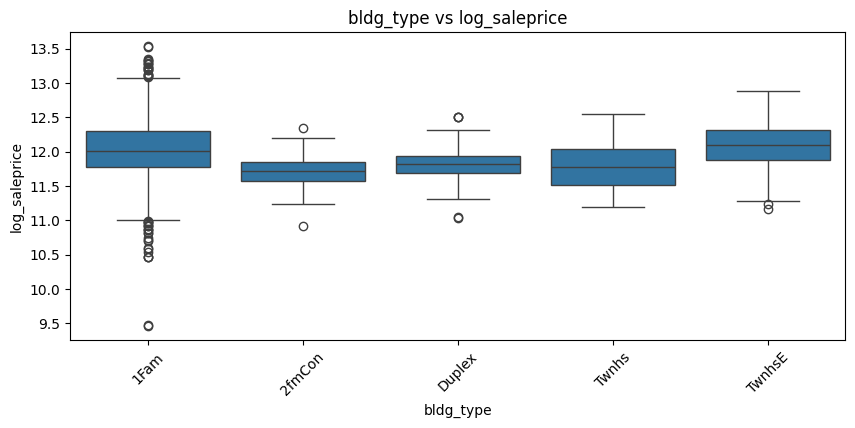

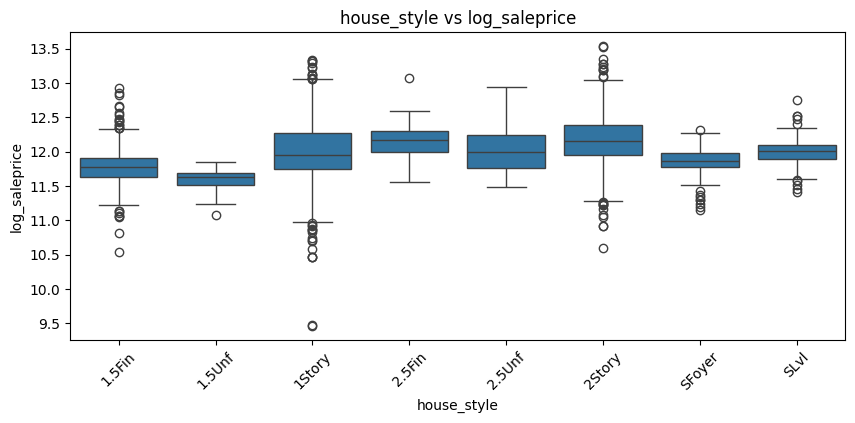

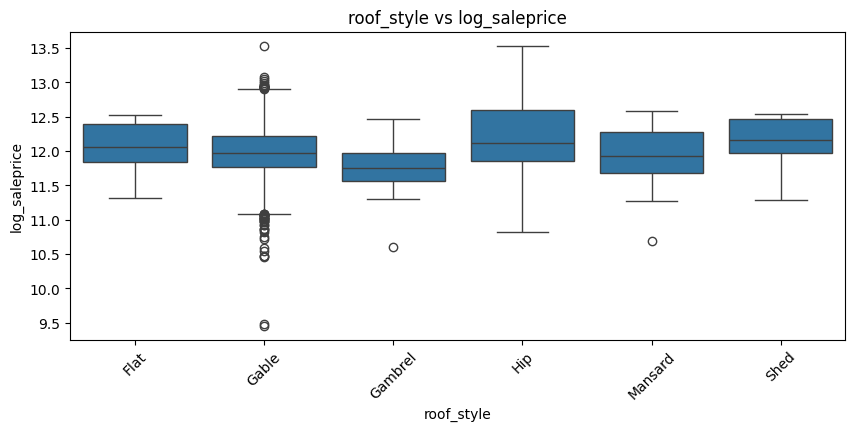

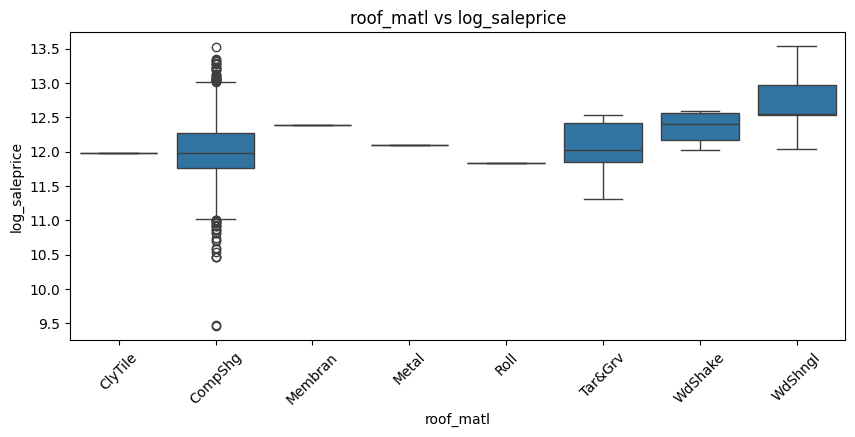

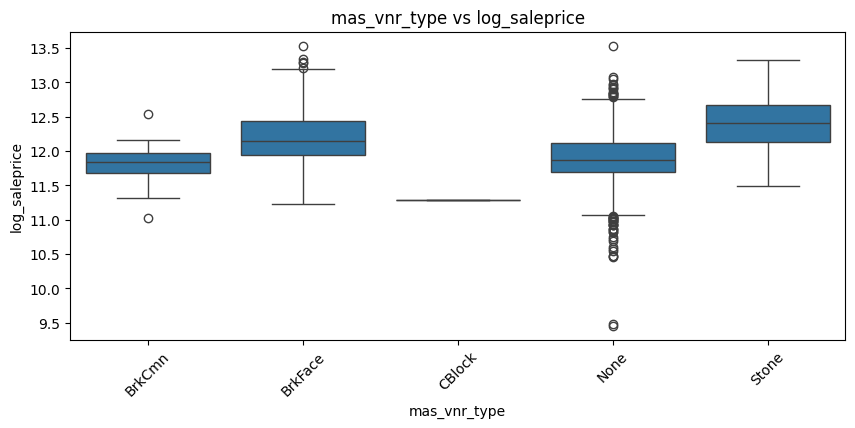

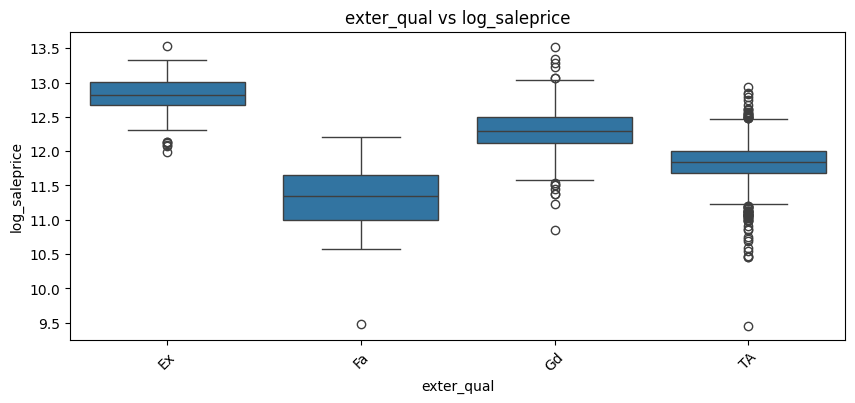

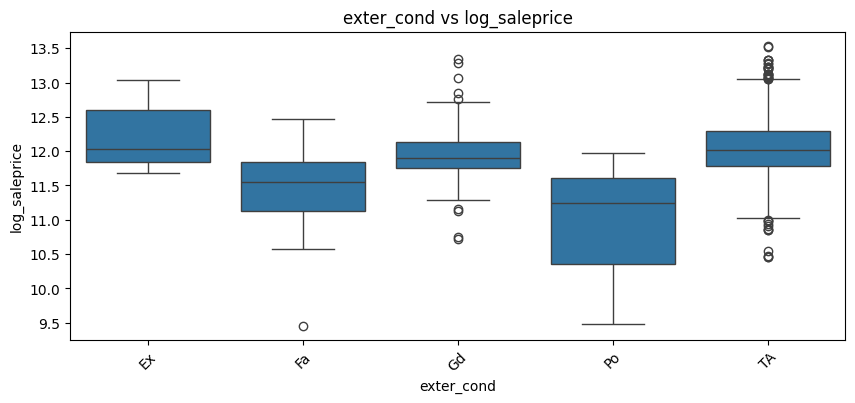

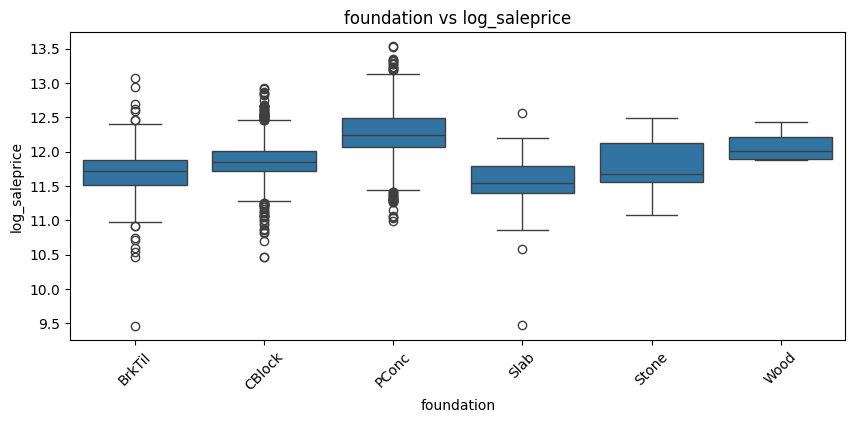

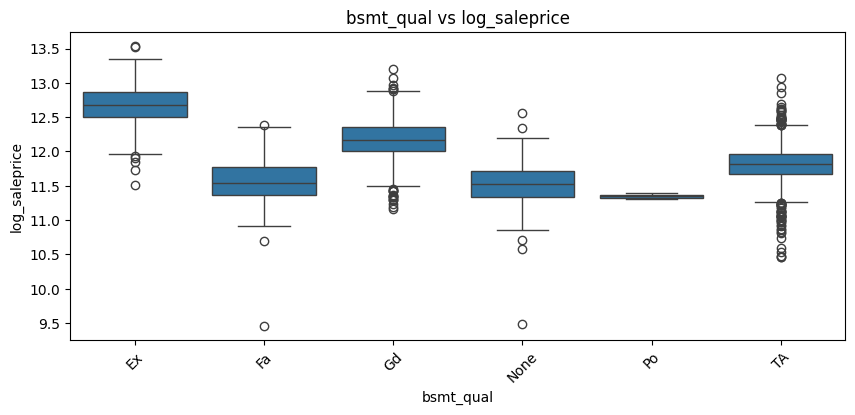

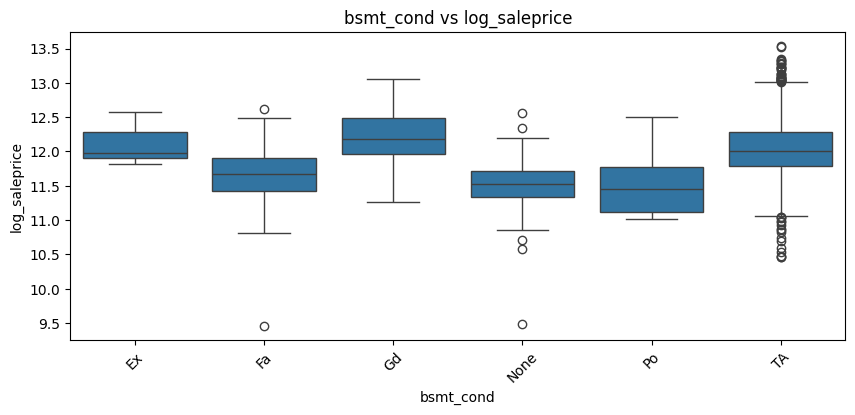

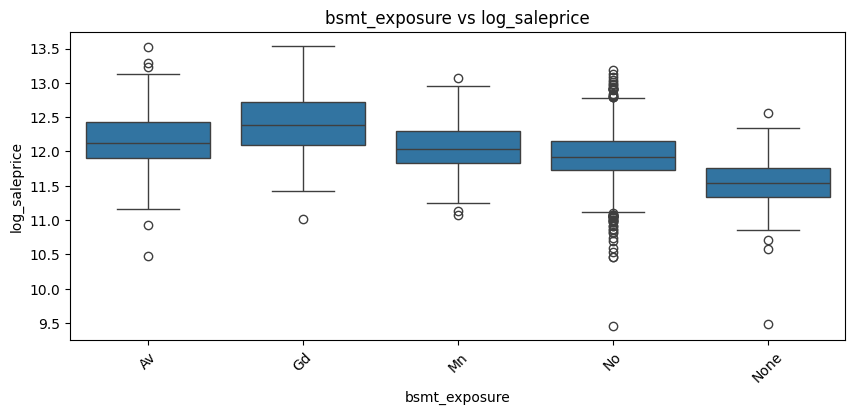

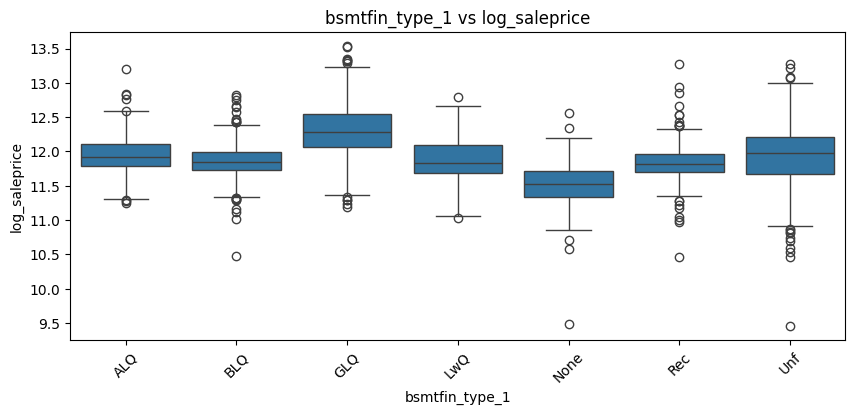

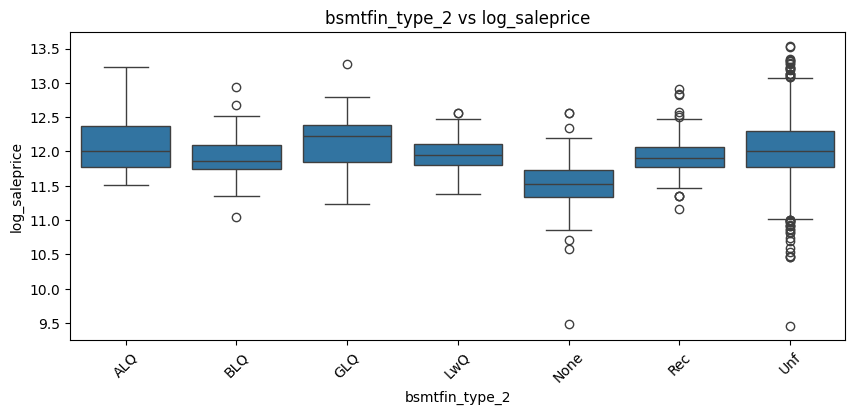

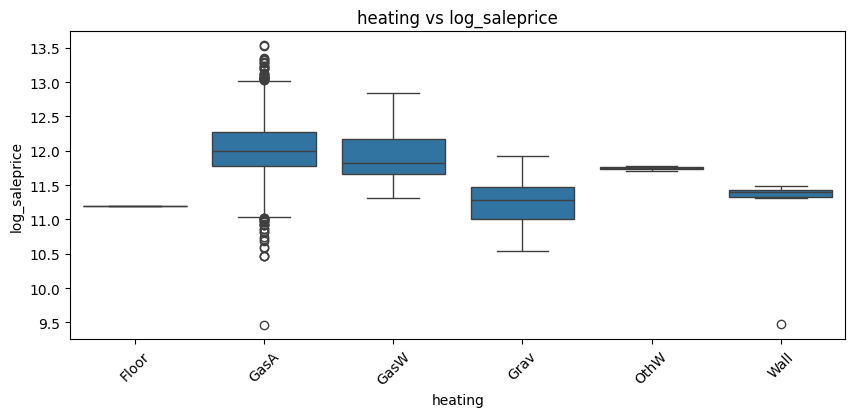

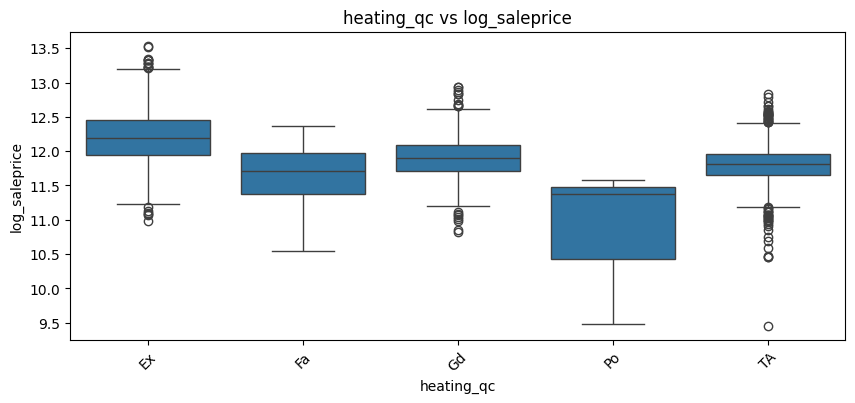

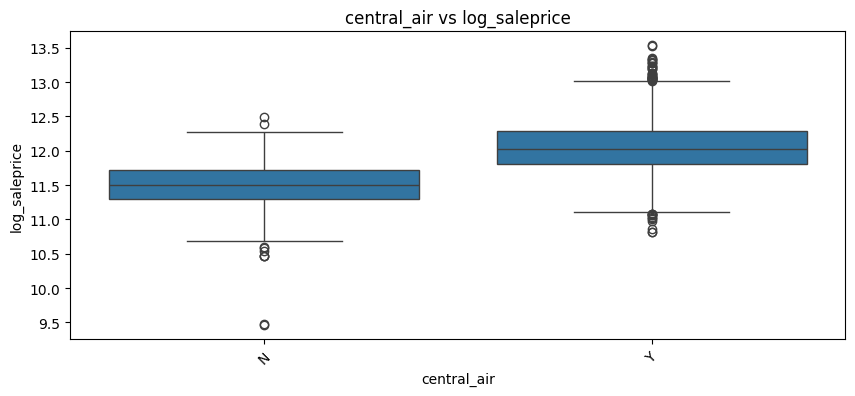

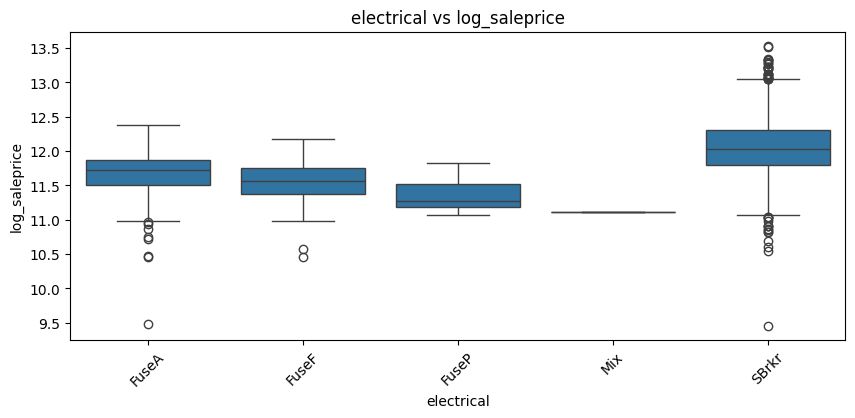

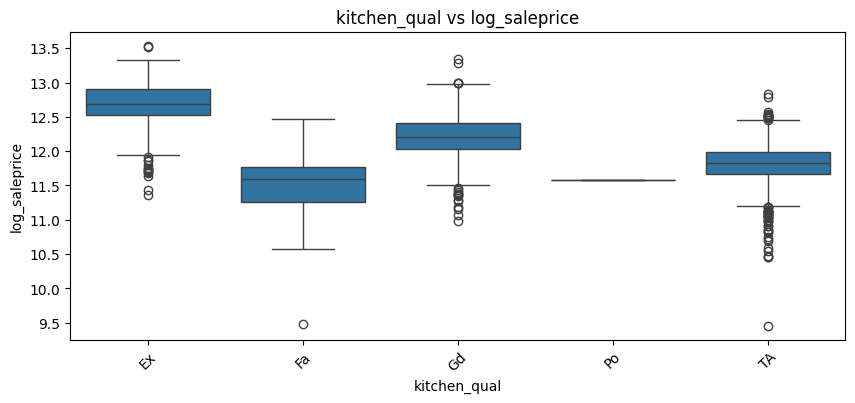

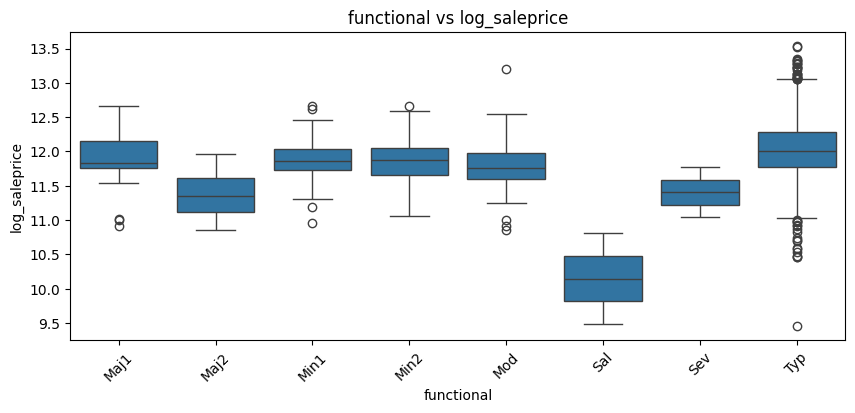

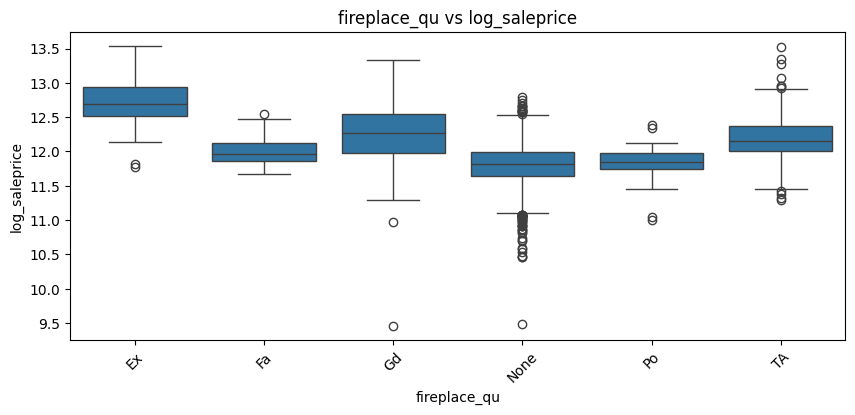

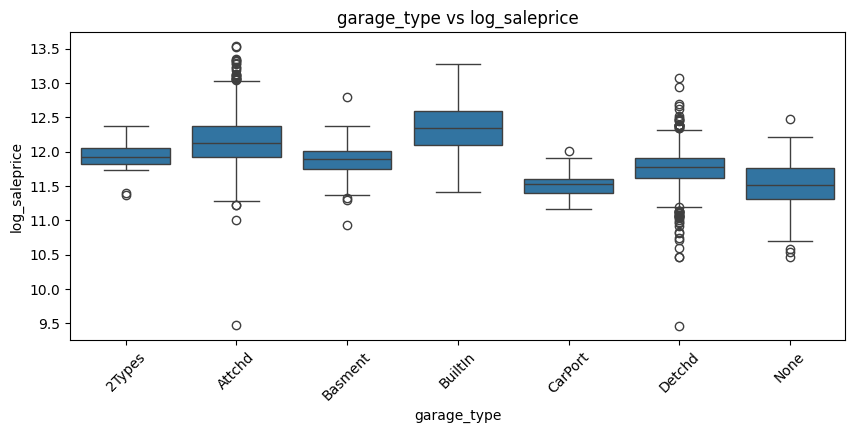

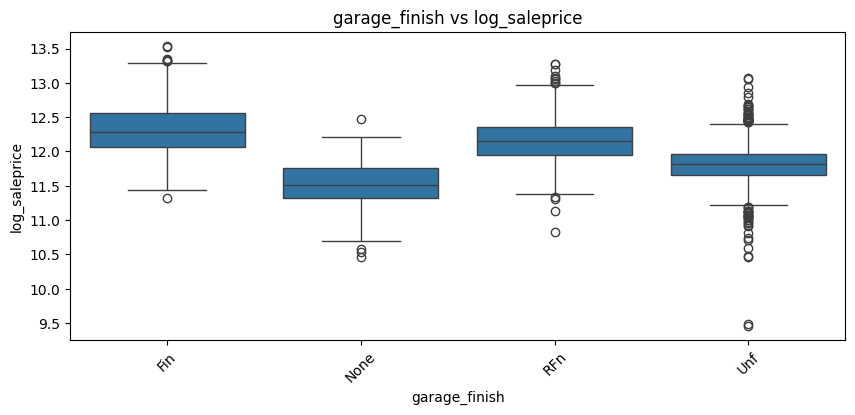

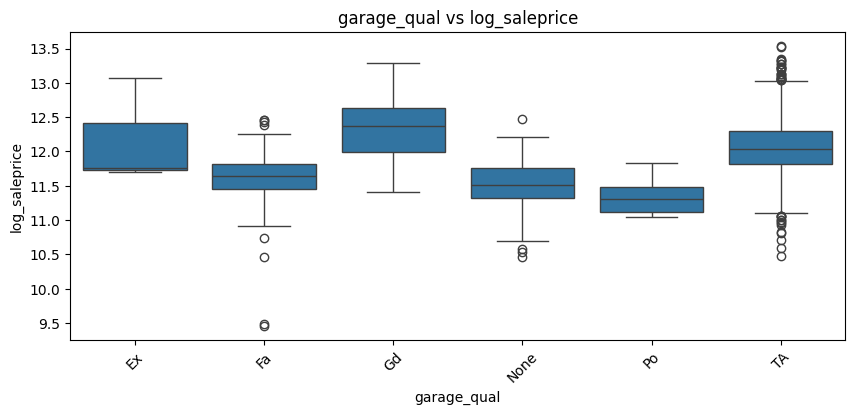

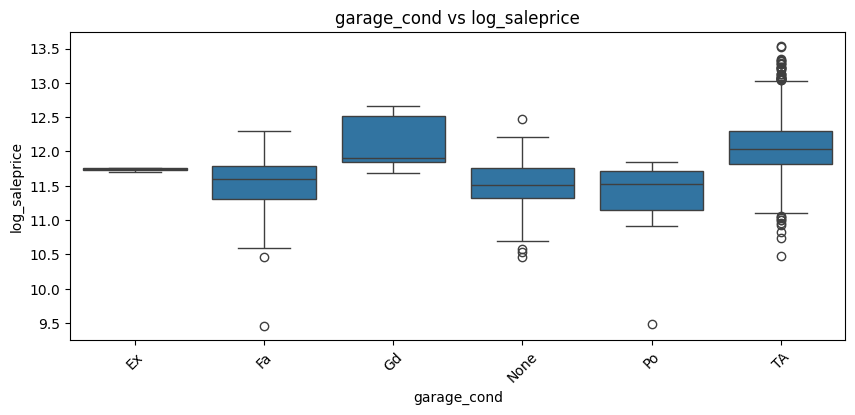

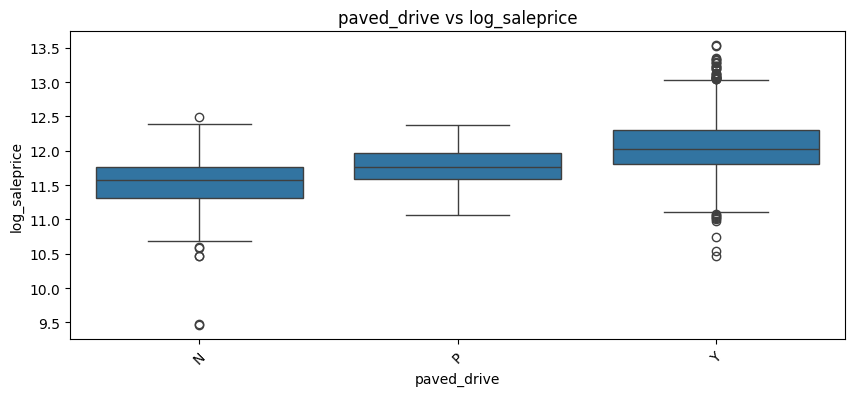

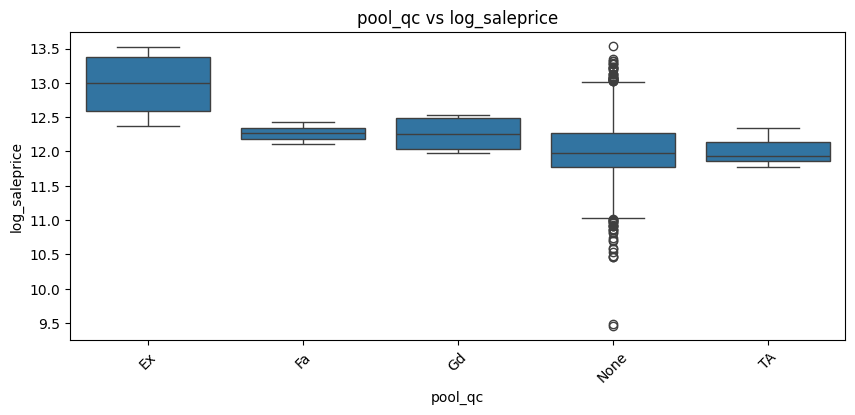

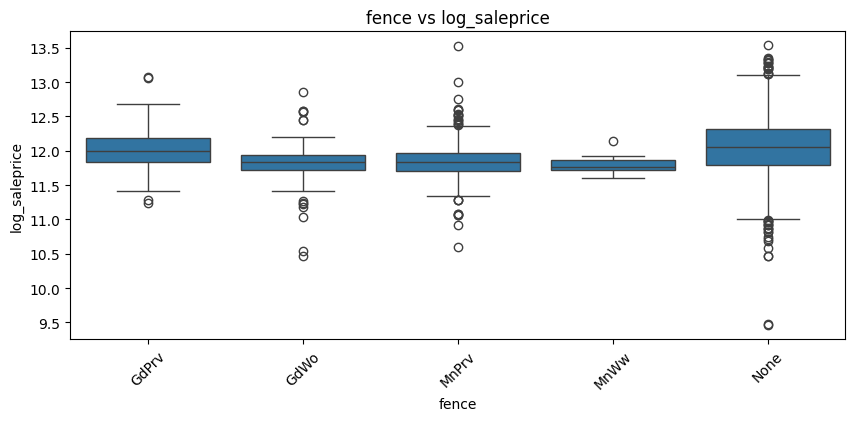

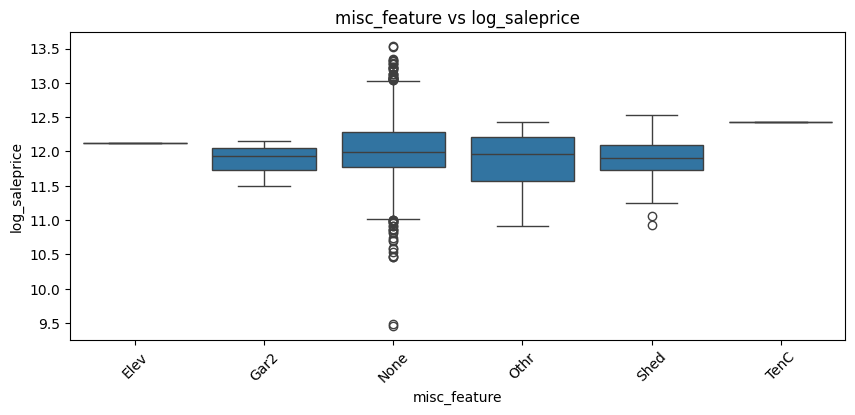

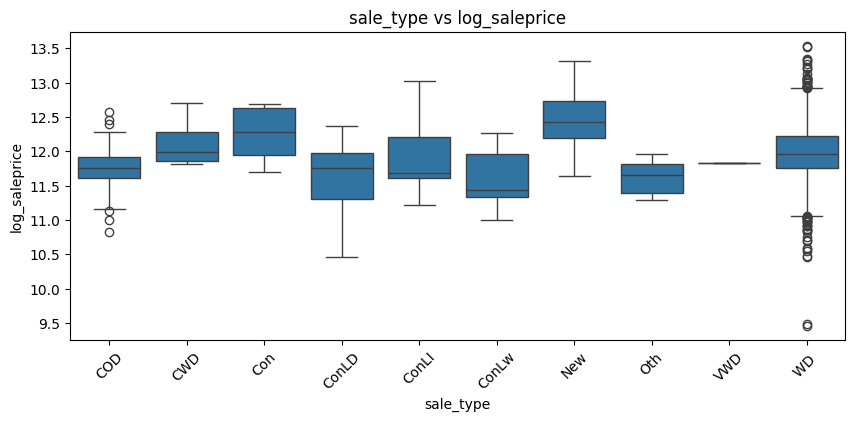

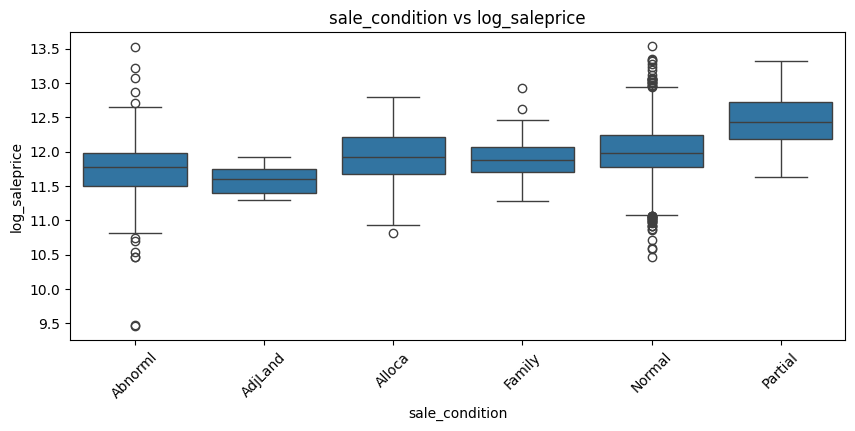

In [100]:
for col in categorical_feats:
    if df[col].nunique() < 15:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=col, y='log_saleprice', data=df)
        plt.xticks(rotation=45)
        plt.title(f'{col} vs log_saleprice')
        plt.show()

In [101]:
cat_cols = df.select_dtypes(include='category').columns
cardinality = df[cat_cols].nunique().sort_values(ascending=False)
print(cardinality)

neighborhood      28
exterior_2nd      17
exterior_1st      16
sale_type         10
condition_1        9
house_style        8
functional         8
roof_matl          8
condition_2        8
ms_zoning          7
bsmtfin_type_1     7
garage_type        7
bsmtfin_type_2     7
sale_condition     6
misc_feature       6
fireplace_qu       6
bsmt_cond          6
roof_style         6
garage_cond        6
garage_qual        6
heating            6
bsmt_qual          6
foundation         6
bldg_type          5
bsmt_exposure      5
lot_config         5
heating_qc         5
fence              5
pool_qc            5
kitchen_qual       5
electrical         5
mas_vnr_type       5
exter_cond         5
land_contour       4
lot_shape          4
exter_qual         4
garage_finish      4
alley              3
utilities          3
paved_drive        3
land_slope         3
street             2
central_air        2
dtype: int64


Outliers/Anomalies

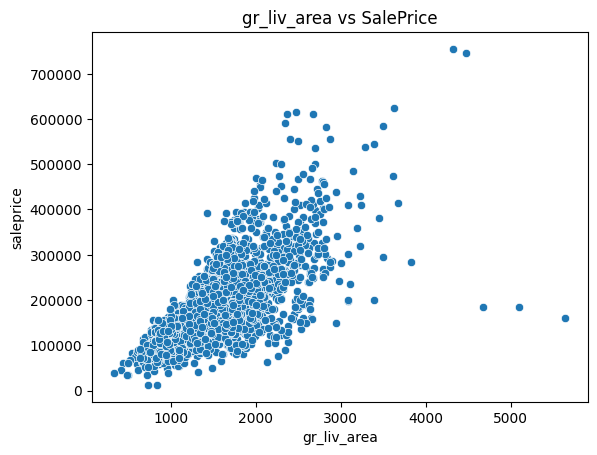

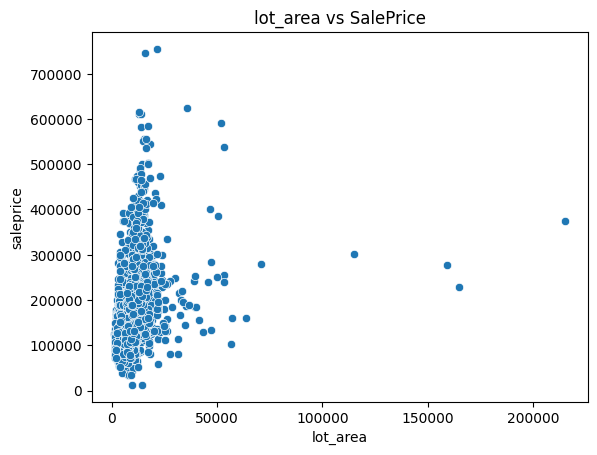

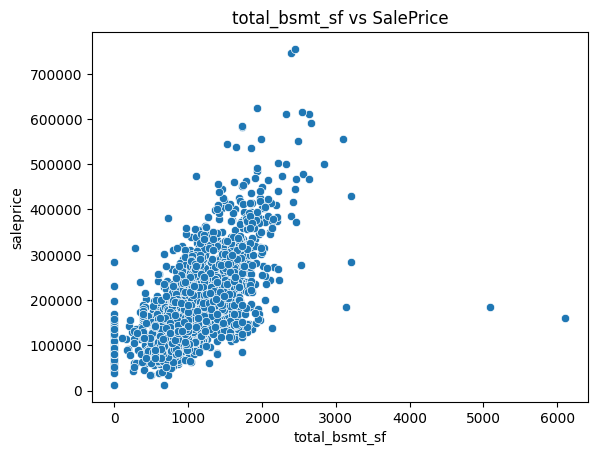

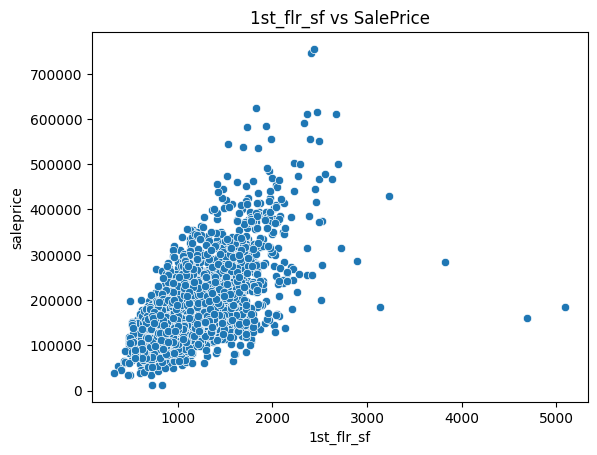

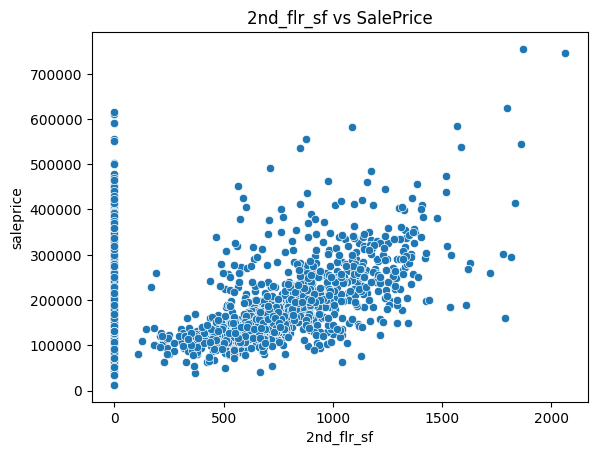

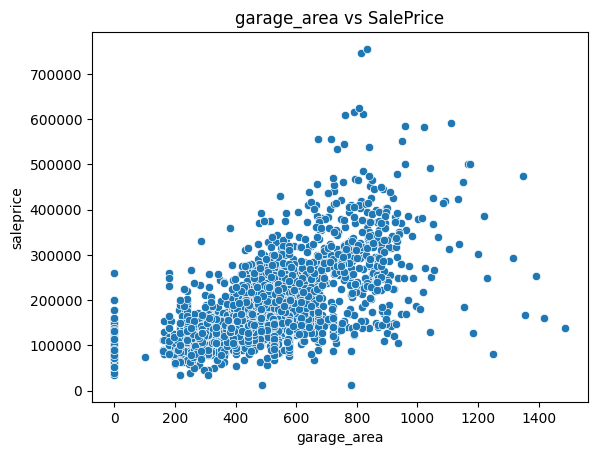

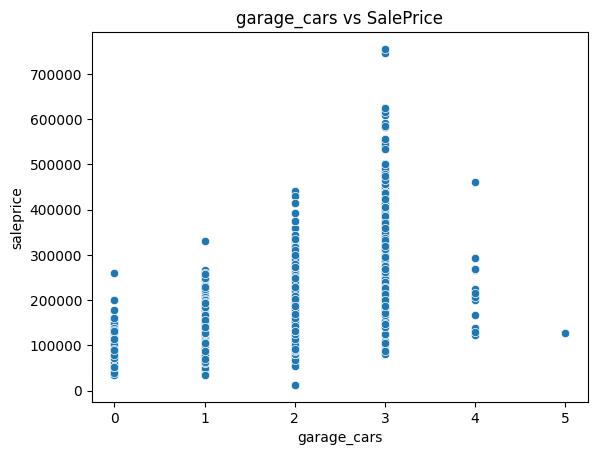

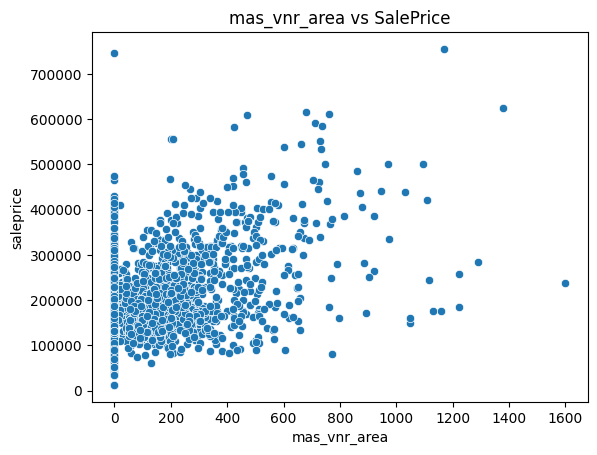

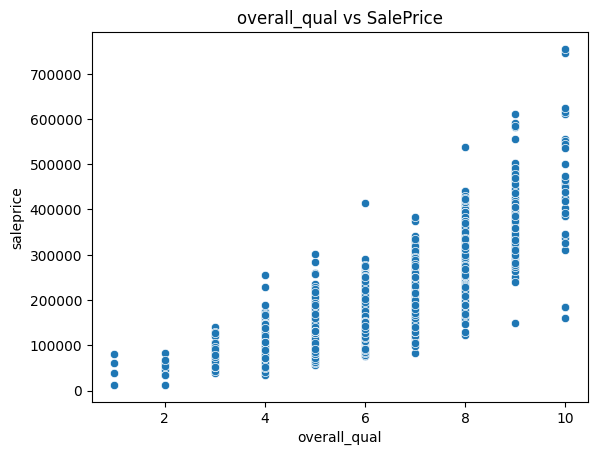

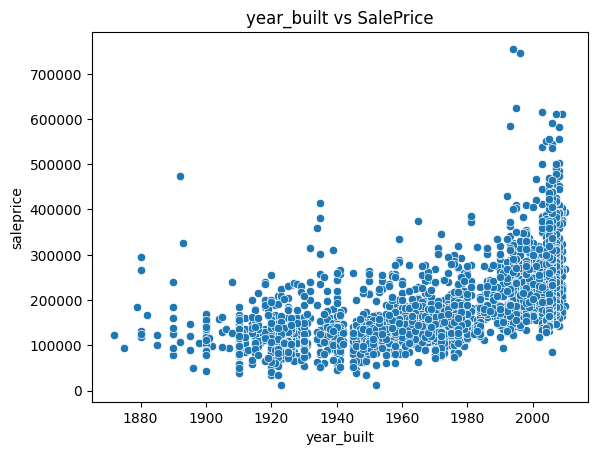

In [102]:
features_to_check = [
    'gr_liv_area', 'lot_area', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
    'garage_area', 'garage_cars', 'mas_vnr_area', 'overall_qual', 'year_built'
]

for col in features_to_check:
    sns.scatterplot(x=df[col], y=df['saleprice'])
    plt.title(f'{col} vs SalePrice')
    plt.show()


In [105]:
iqr_columns = ['gr_liv_area', 'lot_area', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
    'garage_area', 'garage_cars', 'mas_vnr_area', 'overall_qual', 'year_built']

df_clean = remove_extreme_outliers(df, iqr_columns=iqr_columns)

Starting outlier removal...
Removed 3 known outliers based on GrLivArea and Saleprice.


AttributeError: 'Series' object has no attribute 'quanitle'